<a href="https://colab.research.google.com/github/zainamri/tengoknijelah/blob/main/bookhotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import skew, norm, probplot
from scipy.stats import skew, kurtosis
from scipy import stats
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [13]:
# Connect to Google DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Melakukan import data "Bank Churn Modelling".
# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/hotel/hotel_bookings.csv")

In [15]:
# Pemahaman Struktur Data
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
# Statistik deskriptif
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [17]:
# Evaluasi Integritas Data
# Memeriksa nilai data yang hilang
missing_values = df.isna().sum().sort_values(ascending = False)
# Tampilkan nilai data yang hilang
print("Nilai-nilai yang Hilang:\n", missing_values)

Nilai-nilai yang Hilang:
 company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                         

In [18]:
# Memeriksa Duplikasi
df.duplicated().sum()

31994

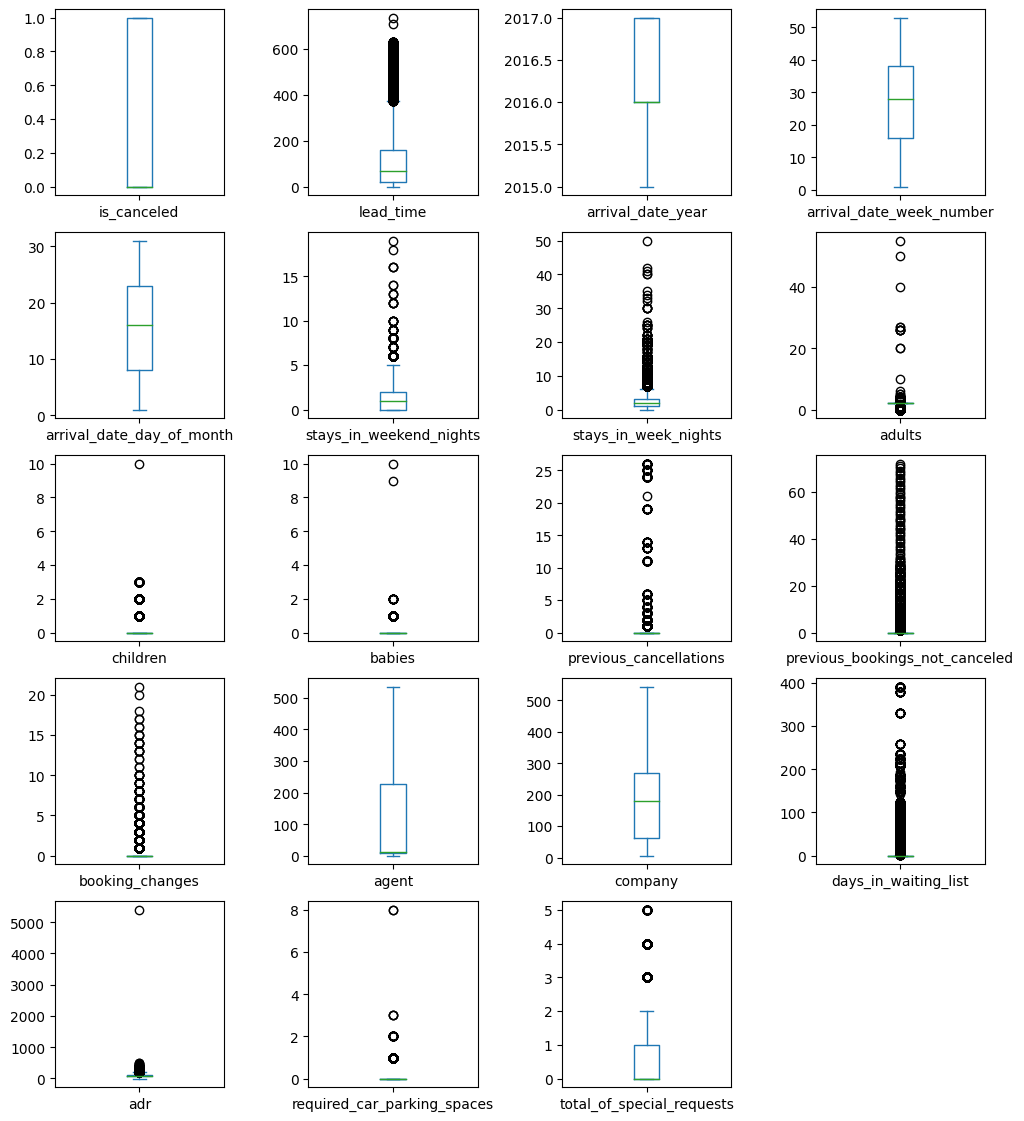

In [42]:
# Memeriksa Outlier
# Daftar nama kolom yang ingin dihapus
columns_to_drop = ['hotel',	'reservation_status_date', 'is_repeated_guest', 'reservation_status']

# Menghapus kolom-kolom tersebut dari DataFrame
numerical_columns = df.drop(columns=columns_to_drop)

# Pilih hanya kolom-kolom numerik
numerical_columns = numerical_columns.select_dtypes(include=['float64', 'int64'])

# Mendapatkan jumlah kolom numerik
num_numerical_columns = len(numerical_columns.columns)

# Menghitung jumlah baris dan kolom untuk tata letak
num_rows = (num_numerical_columns - 1) // 4 + 1
num_cols = min(4, num_numerical_columns)

# Cek outlier dengan visualisasi box plot
numerical_columns.plot(subplots=True, layout=(num_rows, num_cols), kind='box', figsize=(12, 14))
plt.subplots_adjust(wspace=0.5)
plt.show()

In [43]:
# 2.3.5. Memeriksa Outlier
# Memilih hanya atribut numerik
numeric_cols = df.select_dtypes(include='number')
# Menghitung IQR untuk setiap kolom
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
# Mengidentifikasi outlier
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
# Menampilkan atribut numerik yang memiliki outlier
print("Atribut numerik dengan outlier:")
print(outliers[outliers].index)
outliers.sum()

Atribut numerik dengan outlier:
RangeIndex(start=0, stop=119390, step=1)


is_canceled                           0
lead_time                          3005
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights             265
stays_in_week_nights               3354
adults                            29710
children                           8590
babies                              917
is_repeated_guest                  3810
previous_cancellations             6484
previous_bookings_not_canceled     3620
booking_changes                   18076
agent                                 0
company                               0
days_in_waiting_list               3698
adr                                3793
required_car_parking_spaces        7416
total_of_special_requests          2877
dtype: int64

In [28]:
#Memeriksa Data Tidak Konsisten
# Cek unik nilai pada kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  unique_values = df[col].unique()
  print(f'Unique values in {col}: {unique_values}')

Unique values in hotel: ['Resort Hotel' 'City Hotel']
Unique values in arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique values in meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG

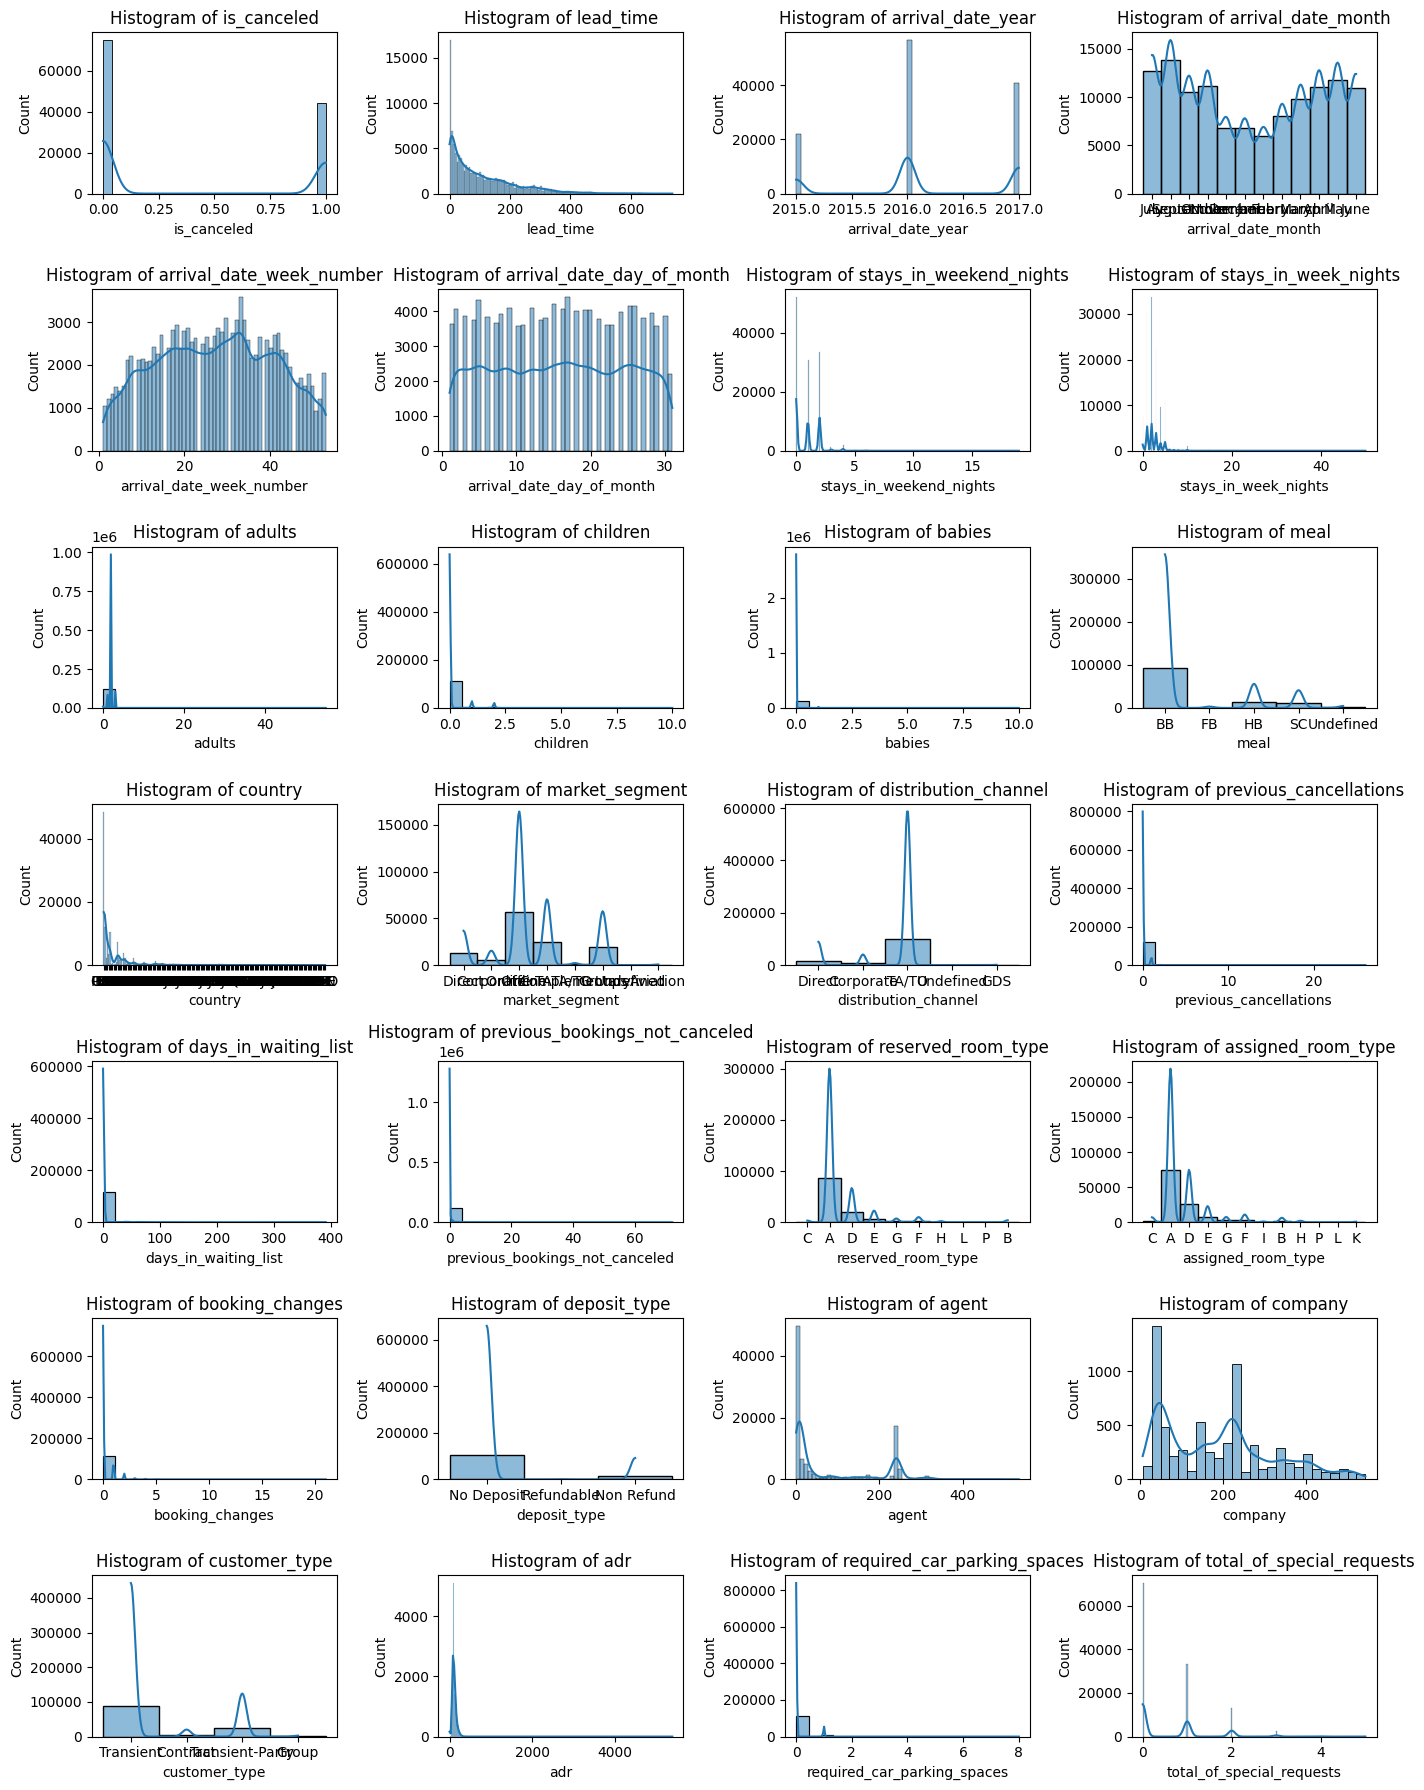

In [45]:
columns_to_plot = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'previous_cancellations', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes',	'deposit_type', 'agent', 'company', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
# Membuat subplot untuk histogram
plt.figure(figsize=(14, 18))
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(7, 4, i)
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
plt.tight_layout()
plt.show()

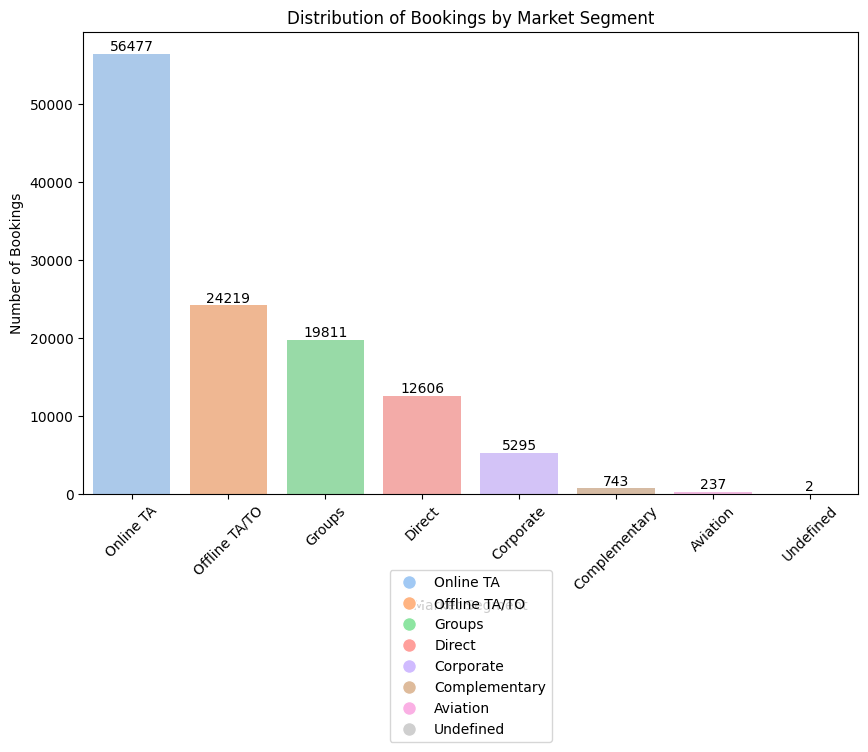

In [47]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Hitung jumlah observasi distribusi data market segment
market_segment_counts = df_temp['market_segment'].value_counts().reset_index()
market_segment_counts.columns = ['market_segment', 'count']

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=market_segment_counts, x='market_segment', y='count', palette="pastel", hue='market_segment', dodge=False, legend=False)

# Tambahkan nilai data pada grafik
for i, value in enumerate(market_segment_counts['count']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan legend berdasarkan warna pada sumbu x
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=sns.color_palette("pastel")[i], markersize=10)
                 for i, label in enumerate(market_segment_counts['market_segment'])]

plt.title('Distribution of Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

# Letakkan legend pada posisi bawah
plt.legend(handles=legend_labels, bbox_to_anchor=(0.5, -0.15), loc='upper center')
plt.show()

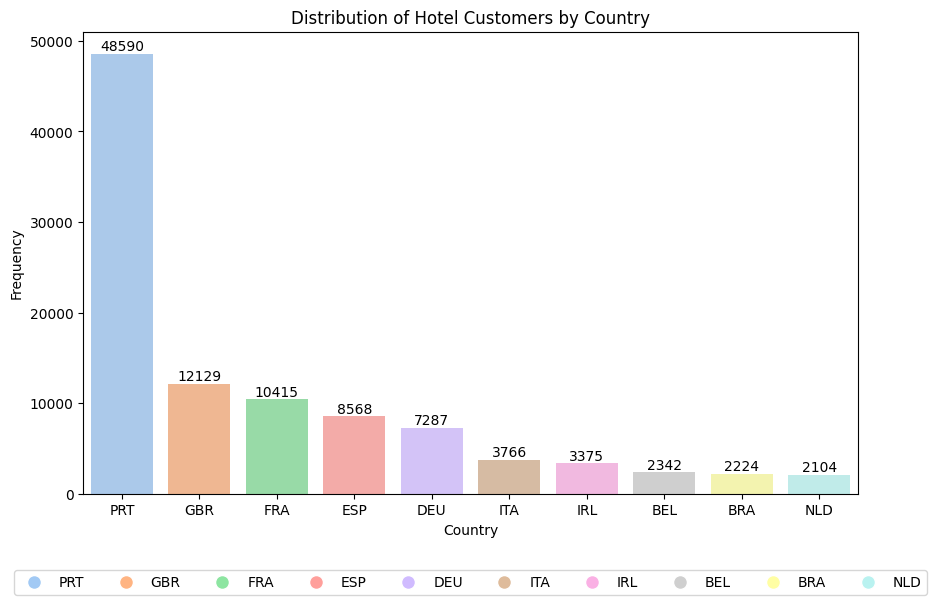

In [79]:
# Hitung jumlah observasi distribusi data Geografi
country_counts = df['country'].value_counts()

# Persiapan data untuk bar chart
labels = country_counts.index[:10]
values = country_counts.values[:10]

# Pilih palet warna yang lebih besar jika diperlukan
palette = "pastel" if len(labels) <= len(sns.color_palette("pastel")) else "hls"

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=labels, y=values, hue=labels, palette=palette, dodge=False, legend=False)

# Tambahkan nilai data pada grafik
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan legend berdasarkan warna pada sumbu x
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=sns.color_palette(palette)[i % len(sns.color_palette(palette))], markersize=10)
                 for i, label in enumerate(labels)]

plt.title('Distribution of Hotel Customers by Country')
plt.xlabel('Country')
plt.ylabel('Frequency')

# Letakkan legend pada posisi bawah
plt.legend(handles=legend_labels, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(labels))

plt.show()


<ipython-input-76-388316c010e3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=values, palette="pastel")


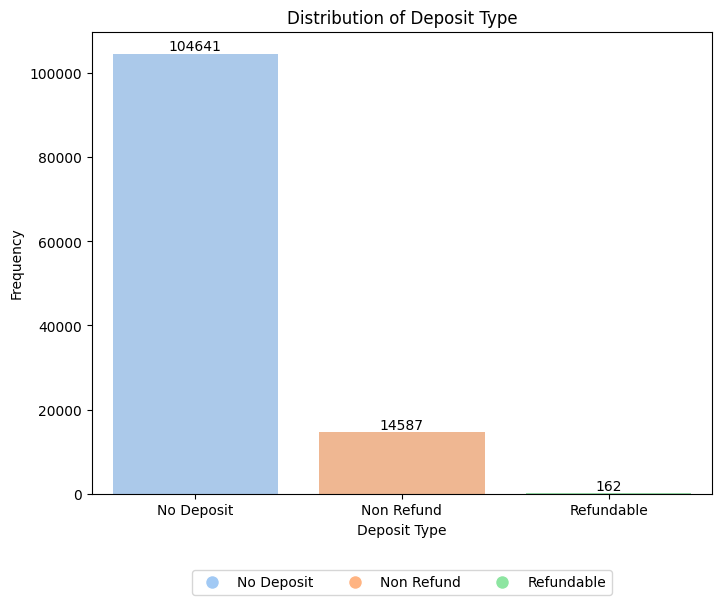

In [76]:
# Membuat duplikat sementara DataFrame
df_temp = df.copy()

# Mengganti nilai dalam DataFrame duplikat dengan label yang sesuai untuk 'Deposit Type'
df_temp['deposit_type'] = df_temp['deposit_type'].replace({'No Deposit': 'No Deposit', 'Non Refund': 'Non Refund', 'Refundable': 'Refundable'})

# Hitung jumlah observasi distribusi data 'deposit_type'
deposit_counts = df_temp['deposit_type'].value_counts()

# Persiapan data untuk bar chart
labels = deposit_counts.index
values = deposit_counts.values

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=labels, y=values, palette="pastel")

# Tambahkan nilai data pada grafik
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

# Tambahkan legend berdasarkan warna pada sumbu x
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                             markerfacecolor=sns.color_palette("pastel")[i], markersize=10)
                 for i, label in enumerate(labels)]

plt.title('Distribution of Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Frequency')

# Letakkan legend pada posisi bawah
plt.legend(handles=legend_labels, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=len(labels))

plt.show()


<ipython-input-78-4df5babeb5ab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_lead_time = sns.barplot(x=labels_lead_time, y=values_lead_time, palette="pastel")


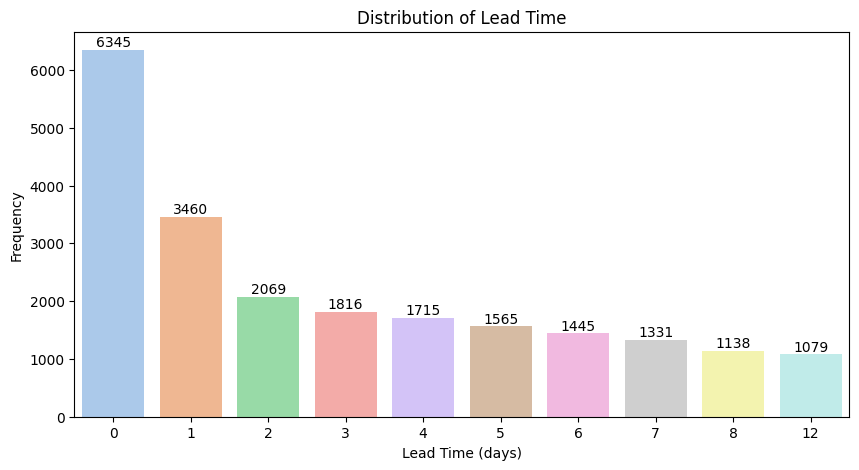

In [78]:
# Hitung jumlah observasi distribusi data untuk setiap atribut
lead_time_counts = df['lead_time'].value_counts()

# Persiapan data untuk bar chart
# Anda bisa membatasi jumlah nilai unik yang akan ditampilkan jika terlalu banyak
labels_lead_time = lead_time_counts.index[:10]
values_lead_time = lead_time_counts.values[:10]

# Plot bar chart untuk Lead Time
plt.figure(figsize=(10, 5))
bars_lead_time = sns.barplot(x=labels_lead_time, y=values_lead_time, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_lead_time):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time')

# Tampilkan plot
plt.show()


<ipython-input-80-a76e8a32322e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_arrival_month = sns.barplot(x=labels_arrival_month, y=values_arrival_month, palette="pastel")


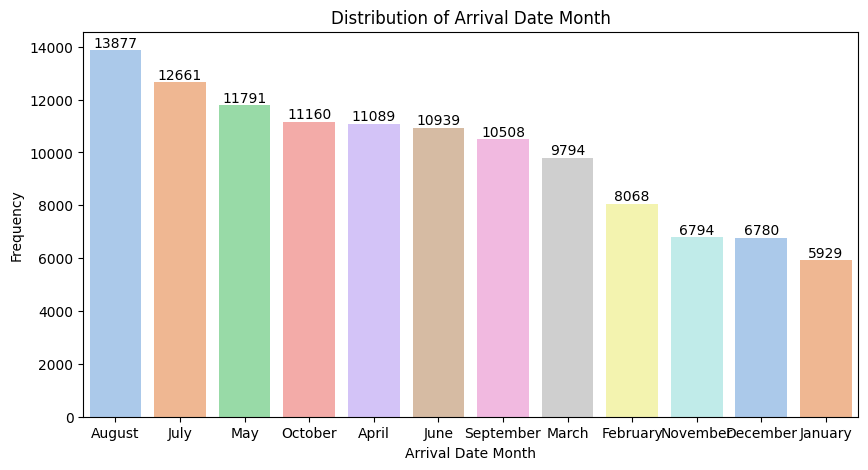

In [80]:
# Hitung jumlah observasi distribusi data untuk bulan kedatangan
arrival_month_counts = df['arrival_date_month'].value_counts()

# Persiapan data untuk bar chart
labels_arrival_month = arrival_month_counts.index
values_arrival_month = arrival_month_counts.values

# Plot bar chart untuk bulan kedatangan
plt.figure(figsize=(10, 5))
bars_arrival_month = sns.barplot(x=labels_arrival_month, y=values_arrival_month, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_arrival_month):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Arrival Date Month')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Date Month')

# Tampilkan plot
plt.show()

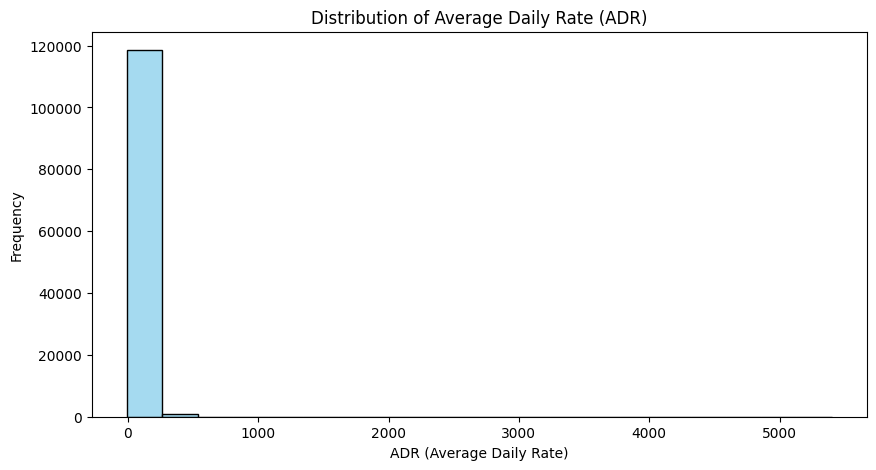

In [81]:
# Persiapan data untuk histogram ADR
plt.figure(figsize=(10, 5))
sns.histplot(df['adr'], bins=20, kde=False, color='skyblue')  # Sesuaikan jumlah bins sesuai kebutuhan Anda
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Daily Rate (ADR)')

# Tampilkan plot
plt.show()

<ipython-input-82-908668b2e23b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_booking_changes = sns.barplot(x=labels_booking_changes, y=values_booking_changes, palette="pastel")


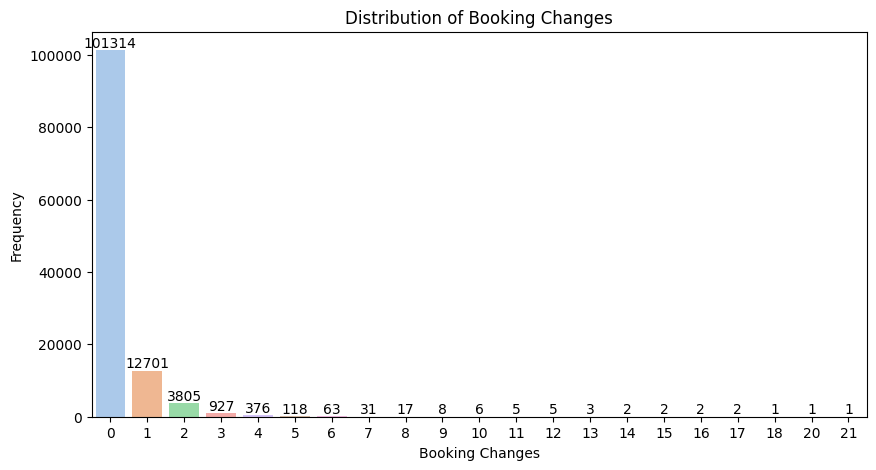

In [82]:
# Hitung jumlah observasi distribusi data untuk jumlah perubahan pada pemesanan
booking_changes_counts = df['booking_changes'].value_counts()

# Persiapan data untuk bar chart
labels_booking_changes = booking_changes_counts.index
values_booking_changes = booking_changes_counts.values

# Plot bar chart untuk jumlah perubahan pada pemesanan
plt.figure(figsize=(10, 5))
bars_booking_changes = sns.barplot(x=labels_booking_changes, y=values_booking_changes, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_booking_changes):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Booking Changes')
plt.ylabel('Frequency')
plt.title('Distribution of Booking Changes')

# Tampilkan plot
plt.show()

<ipython-input-88-473c29cf3905>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_room_type = sns.barplot(x=labels_room_type, y=values_room_type, palette="pastel")


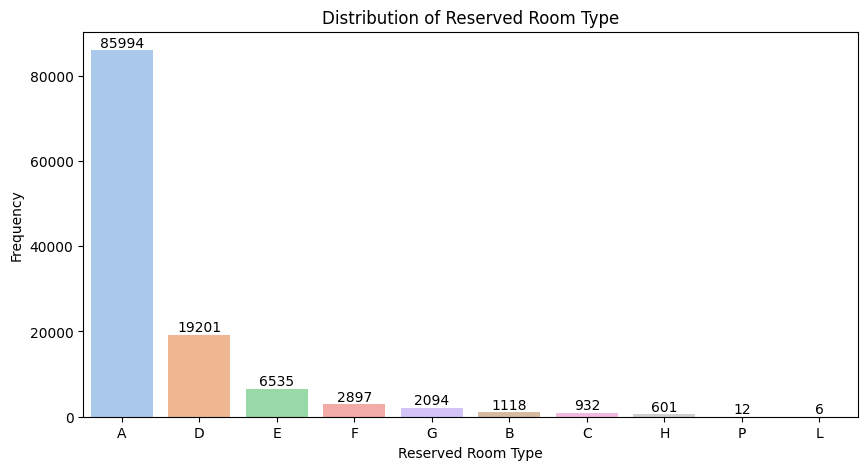

In [88]:
# Hitung jumlah observasi distribusi data untuk tipe kamar yang dipesan
room_type_counts = df['reserved_room_type'].value_counts()

# Persiapan data untuk bar chart
labels_room_type = room_type_counts.index
values_room_type = room_type_counts.values

# Plot bar chart untuk tipe kamar yang dipesan
plt.figure(figsize=(10, 5))
bars_room_type = sns.barplot(x=labels_room_type, y=values_room_type, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_room_type):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Reserved Room Type')
plt.ylabel('Frequency')
plt.title('Distribution of Reserved Room Type')

# Tampilkan plot
plt.show()


<ipython-input-89-f329da37c54b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_customer_type = sns.barplot(x=labels_customer_type, y=values_customer_type, palette="pastel")


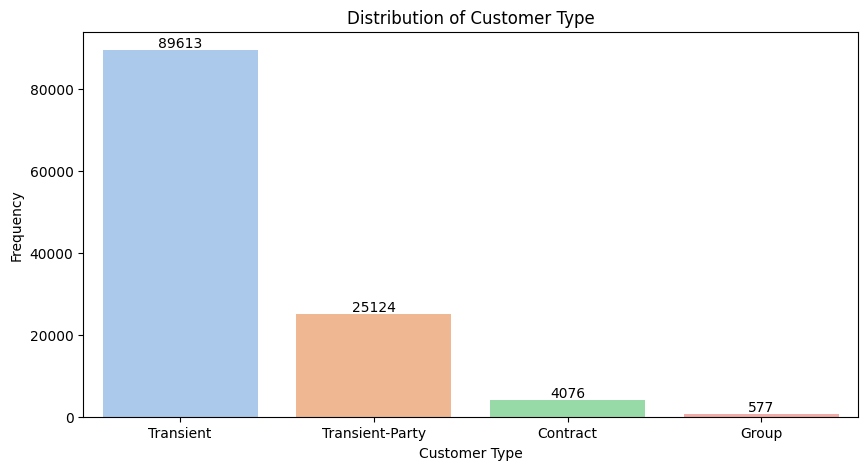

In [89]:
# Hitung jumlah observasi distribusi data untuk tipe pelanggan
customer_type_counts = df['customer_type'].value_counts()

# Persiapan data untuk bar chart
labels_customer_type = customer_type_counts.index
values_customer_type = customer_type_counts.values

# Plot bar chart untuk tipe pelanggan
plt.figure(figsize=(10, 5))
bars_customer_type = sns.barplot(x=labels_customer_type, y=values_customer_type, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_customer_type):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Type')

# Tampilkan plot
plt.show()


<ipython-input-90-76586cf05950>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_special_requests = sns.barplot(x=labels_special_requests, y=values_special_requests, palette="pastel")


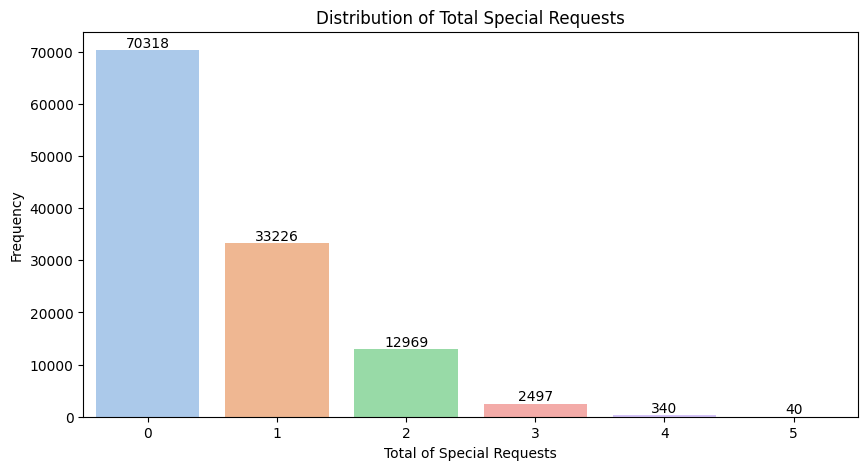

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah observasi distribusi data untuk jumlah permintaan khusus
special_requests_counts = df['total_of_special_requests'].value_counts()

# Persiapan data untuk bar chart
labels_special_requests = special_requests_counts.index
values_special_requests = special_requests_counts.values

# Plot bar chart untuk jumlah permintaan khusus
plt.figure(figsize=(10, 5))
bars_special_requests = sns.barplot(x=labels_special_requests, y=values_special_requests, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_special_requests):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Total of Special Requests')
plt.ylabel('Frequency')
plt.title('Distribution of Total Special Requests')

# Tampilkan plot
plt.show()


<ipython-input-92-34291fdb5c9a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_waiting_list = sns.barplot(x=labels_waiting_list, y=values_waiting_list, palette="pastel")


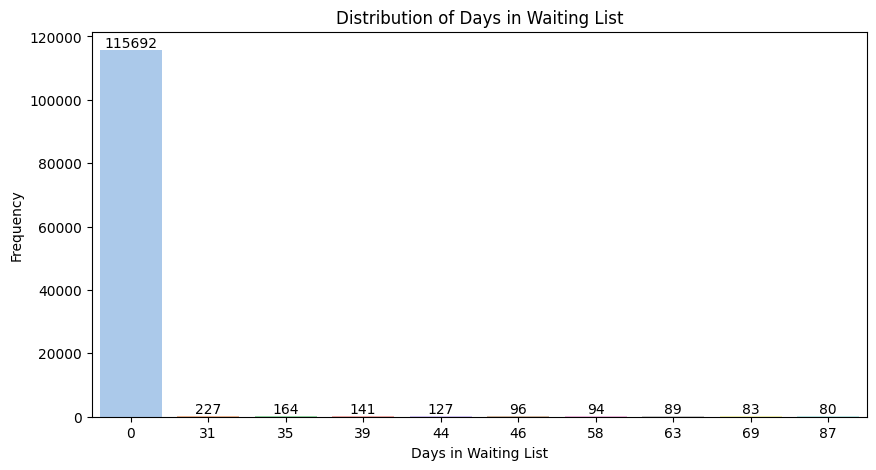

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah observasi distribusi data untuk jumlah hari dalam daftar tunggu
waiting_list_counts = df['days_in_waiting_list'].value_counts()

# Persiapan data untuk bar chart
labels_waiting_list = waiting_list_counts.index[:10]
values_waiting_list = waiting_list_counts.values[:10]

# Plot bar chart untuk jumlah hari dalam daftar tunggu
plt.figure(figsize=(10, 5))
bars_waiting_list = sns.barplot(x=labels_waiting_list, y=values_waiting_list, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_waiting_list):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.title('Distribution of Days in Waiting List')

# Tampilkan plot
plt.show()


<ipython-input-93-c8835861b237>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_agents = sns.barplot(x=labels_agents, y=values_agents, palette="pastel")


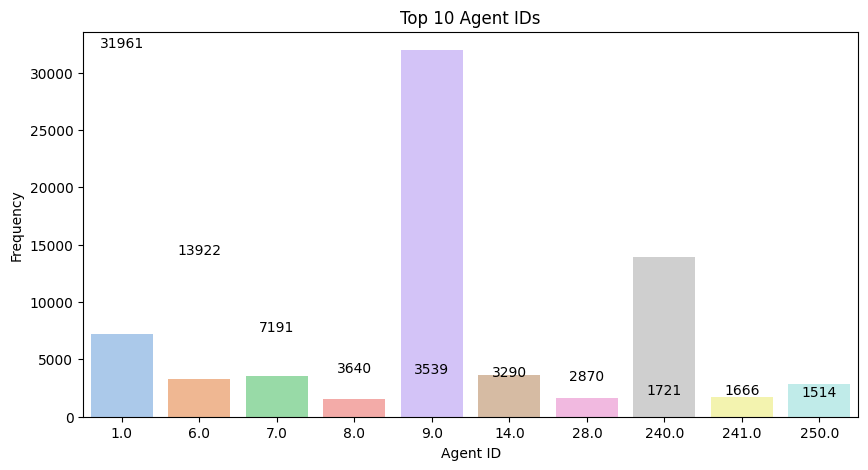

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah observasi distribusi data untuk ID agen perjalanan
agent_counts = df['agent'].value_counts()

# Ambil 10 agen perjalanan dengan frekuensi tertinggi untuk visualisasi yang lebih baik
top_agents = agent_counts.head(10)

# Persiapan data untuk bar chart
labels_agents = top_agents.index
values_agents = top_agents.values

# Plot bar chart untuk ID agen perjalanan
plt.figure(figsize=(10, 5))
bars_agents = sns.barplot(x=labels_agents, y=values_agents, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_agents):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Agent ID')
plt.ylabel('Frequency')
plt.title('Top 10 Agent IDs')

# Tampilkan plot
plt.show()


<ipython-input-94-f97e4594834a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_companies = sns.barplot(x=labels_companies, y=values_companies, palette="pastel")


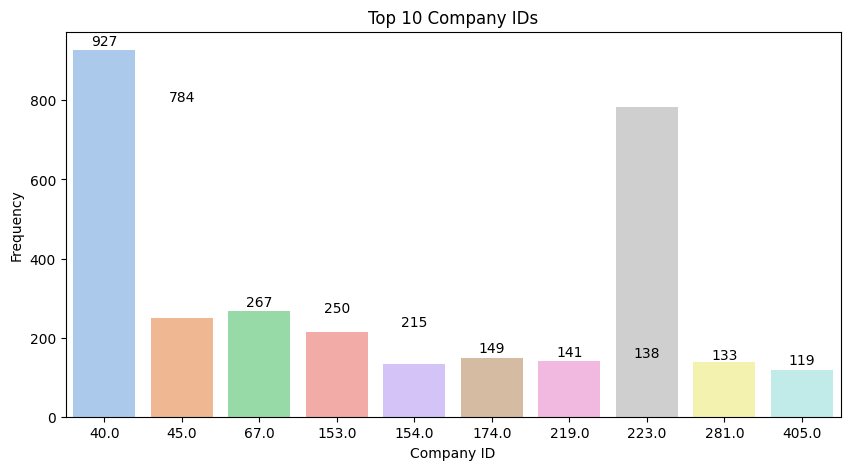

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah observasi distribusi data untuk ID perusahaan
company_counts = df['company'].value_counts()

# Ambil 10 perusahaan dengan frekuensi tertinggi untuk visualisasi yang lebih baik
top_companies = company_counts.head(10)

# Persiapan data untuk bar chart
labels_companies = top_companies.index
values_companies = top_companies.values

# Plot bar chart untuk ID perusahaan
plt.figure(figsize=(10, 5))
bars_companies = sns.barplot(x=labels_companies, y=values_companies, palette="pastel")
# Tambahkan nilai data pada grafik
for i, value in enumerate(values_companies):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
# Tambahkan label pada sumbu x dan y
plt.xlabel('Company ID')
plt.ylabel('Frequency')
plt.title('Top 10 Company IDs')

# Tampilkan plot
plt.show()
